In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.geometry import Point
import random

In [18]:
travel_chain=pd.read_csv('../data/travel-chain-all.csv')

In [19]:
travel_chain.head(5)

,who,date,seiqd,mode,poi_o,poi_d,org_chess_x,org_chess_y,dst_chess_x,dst_chess_y,...,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild,trip_routelen
0,126272,20190101,1,1,0,3,34.0,109.0,20.0,105.0,...,1.260690,0.000000,0.0,0.000000,0.079896,0.000000,0.0,0.0,0.054489,5202.098
1,126272,20190101,2,1,3,14,20.0,105.0,57.0,147.0,...,1.292392,0.000000,0.0,0.000000,0.111717,0.000000,0.0,0.0,0.054817,17573.684
2,126272,20190101,3,1,14,11,57.0,147.0,71.0,111.0,...,0.929526,0.000000,0.0,0.003355,0.176919,0.000000,0.0,0.0,0.060204,10520.347
3,126272,20190101,4,1,11,7,71.0,111.0,40.0,108.0,...,0.008153,0.000000,0.0,0.011535,0.000000,0.000000,0.0,0.0,0.502439,12855.580
4,126272,20190102,1,1,2,9,39.0,68.0,30.0,103.0,...,0.478358,0.091204,0.0,0.217784,0.022694,0.091091,0.0,0.0,0.028547,9647.023


In [4]:
unique_whos = travel_chain['who'].unique()
# random_who = random.choice(unique_whos)
random_who = 36384703
one_df = travel_chain[travel_chain['who'] == random_who]
df = one_df.dropna()
df

,who,date,seiqd,mode,poi_o,poi_d,org_chess_x,org_chess_y,dst_chess_x,dst_chess_y,...,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild,trip_routelen
210835,36384703,20190102,1,1,0,7,116.0,78.0,129.0,48.0,...,0.000000,0.0,0.000000,0.074002,1.966300,0.777020,0.0,0.000000,0.002857,8885.289
210836,36384703,20190102,2,1,7,1,129.0,48.0,119.0,43.0,...,0.000000,0.0,0.061616,0.625118,0.874633,0.087018,0.0,0.000000,0.027380,3314.763
210837,36384703,20190102,3,1,1,0,119.0,43.0,116.0,78.0,...,0.089713,0.0,0.000000,0.000000,0.643236,0.326028,0.0,0.241541,0.237051,11424.598
210838,36384703,20190103,1,1,0,7,116.0,78.0,129.0,48.0,...,0.000000,0.0,0.000000,0.074002,1.966300,0.777020,0.0,0.000000,0.002857,8885.289
210839,36384703,20190103,2,1,7,1,129.0,48.0,119.0,43.0,...,0.000000,0.0,0.061616,0.625118,0.874633,0.087018,0.0,0.000000,0.027380,3314.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212445,36384703,20191231,4,1,1,22,137.0,43.0,113.0,41.0,...,0.311119,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.004433,6436.126
212446,36384703,20191231,5,1,22,9,113.0,41.0,140.0,52.0,...,0.901325,0.0,0.088518,0.223664,0.107662,0.000000,0.0,0.000000,0.000000,8754.220
212447,36384703,20191231,6,1,9,8,140.0,52.0,123.0,41.0,...,0.000000,0.0,0.000000,0.250782,0.000000,0.000000,0.0,0.000000,0.000000,6500.489
212448,36384703,20191231,7,1,8,28,123.0,41.0,132.0,40.0,...,0.000000,0.0,0.000000,0.238971,0.469656,0.000000,0.0,0.000000,0.223821,2874.642


# 获得每一行对应的格网id

In [5]:
df['geometry_o'] = [Point(xy) for xy in zip(df['lambda_o'], df['phi_o'])]
df['geometry_d'] = [Point(xy) for xy in zip(df['lambda_d'], df['phi_d'])]
grid_gdf = gpd.read_file("../data/shenzhen_grid/shenzhen_grid.shp")

geo_df_o = gpd.GeoDataFrame(df, geometry='geometry_o')
result_o = gpd.sjoin(geo_df_o, grid_gdf, how="left", op="within")

geo_df_d = gpd.GeoDataFrame(df, geometry='geometry_d')
result_d = gpd.sjoin(geo_df_d, grid_gdf, how="left", op="within")

d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_63588\2667824445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry_o'] = [Point(xy) for xy in zip(df['lambda_o'], df['phi_o'])]
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipyke

In [6]:
df['grid_id_o'] = result_o['fnid']  # 请使用实际的列名
df['grid_id_d'] = result_d['fnid']  # 同样使用实际的列名

C:\Users\301\AppData\Local\Temp\ipykernel_63588\2162810959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grid_id_o'] = result_o['fnid']  # 请使用实际的列名
C:\Users\301\AppData\Local\Temp\ipykernel_63588\2162810959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grid_id_d'] = result_d['fnid']  # 同样使用实际的列名


In [7]:
columns_to_drop = [
    'poi_o','poi_d','org_chess_x', 'org_chess_y', 'dst_chess_x',
    'dst_chess_y', 'pre_chess_x', 'pre_chess_y', 'post_chess_x', 'post_chess_y',
    'geometry_o', 'geometry_d','home_distance','trip_distance'
]

# 使用 drop 方法删除这些列
df = df.drop(columns=columns_to_drop)

In [8]:
one_df=df.dropna()
one_df.to_csv('../data/one_travel_chain.csv',index=False)
one_df=pd.read_csv('../data/one_travel_chain.csv')

In [9]:
# 根据'date'在'migrt'之前的行划分为一个DataFrame
df_before_migrt = one_df[one_df['date'] < one_df['migrt']]
df_after_migrt = one_df[one_df['date']>one_df['migrt']]

print("DataFrame with 'date' before 'migrt':")
print(len(df_before_migrt))
print("DataFrame with 'date' after 'migrt':")
print(len(df_after_migrt))

DataFrame with 'date' before 'migrt':
581
DataFrame with 'date' after 'migrt':
1011


# traj visualization

C:\Users\301\AppData\Local\Temp\ipykernel_63588\1065905539.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_63588\1065905539.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_ar

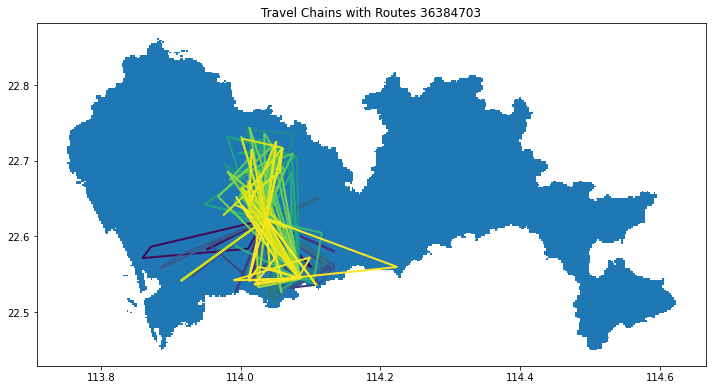

In [10]:
# 读取出行链数据
travel_chain = df_before_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'lambda_o',  'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx =idx+1

    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/before_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=False)
grid_gdf.plot(ax=ax)
plt.title('Travel Chains with Routes {}'.format(random_who))

plt.show()

C:\Users\301\AppData\Local\Temp\ipykernel_63588\2857197544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_63588\2857197544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_ar

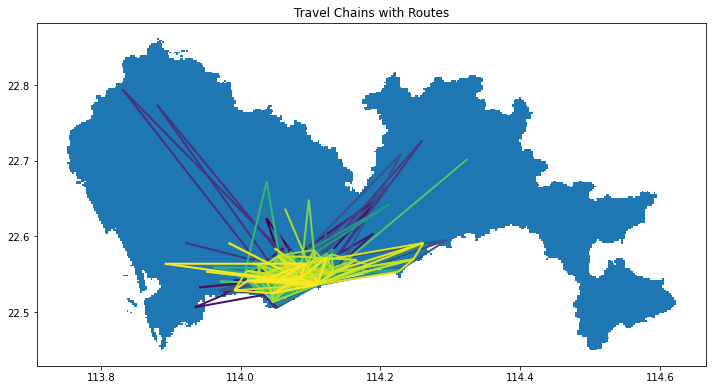

In [11]:
# 读取出行链数据
travel_chain = df_after_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'lambda_o', 'phi_o', 'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx=idx+1
    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/after_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=False)
grid_gdf.plot(ax=ax)
plt.title('Travel Chains with Routes')

plt.show()

# feature selection

In [12]:
one_df.columns

Index(['who', 'date', 'seiqd', 'mode', 'lambda_o', 'phi_o', 'lambda_d',
       'phi_d', 'migrt', 'weekend', 'pre_home_distance', 'post_home_distance',
       'LU_Business', 'LU_City_Road', 'LU_Consumption', 'LU_Culture',
       'LU_Industry', 'LU_Medical', 'LU_Park_&_Scenery', 'LU_Public',
       'LU_Residence', 'LU_Science_&_Education', 'LU_Special',
       'LU_Transportation', 'LU_Wild', 'trip_routelen', 'grid_id_o',
       'grid_id_d'],
      dtype='object')

In [13]:
def mergeFeatureDataframes(df):

    selectedColumns1 = ['grid_id_d', 'pre_home_distance', 'post_home_distance', 'LU_Business',
                        'LU_City_Road', 'LU_Consumption', 'LU_Culture', 'LU_Industry',
                        'LU_Medical', 'LU_Park_&_Scenery', 'LU_Public', 'LU_Residence',
                        'LU_Science_&_Education', 'LU_Special', 'LU_Transportation', 'LU_Wild','trip_routelen'
                        ]
    
    featureDf1 = df[selectedColumns1].drop_duplicates(subset=['grid_id_d'])
    featureDf1 = featureDf1.rename(columns={'grid_id_d':'fnid'})

    selectedColumns2 = ['grid_id_o', 'LU_Business',
                        'LU_City_Road', 'LU_Consumption', 'LU_Culture', 'LU_Industry',
                        'LU_Medical', 'LU_Park_&_Scenery', 'LU_Public', 'LU_Residence',
                        'LU_Science_&_Education', 'LU_Special', 'LU_Transportation', 'LU_Wild','trip_routelen'
                        ]

    featureDf2 = df[selectedColumns2].drop_duplicates(subset=['grid_id_o'])
    featureDf2 = featureDf2.rename(columns={'grid_id_o':'fnid'})

    mergedDf = featureDf1.merge(featureDf2, on='fnid', how='outer')
    mergedDf = mergedDf.fillna(0)

    for col in selectedColumns2:
        if col != 'fnid' and col in featureDf1.columns and col in featureDf2.columns:
            mergedDf[col] = mergedDf[col + '_x'] + mergedDf[col + '_y']
            mergedDf.drop([col + '_x', col + '_y'], axis=1, inplace=True)

    mergedDf.fillna(0, inplace=True)
    return mergedDf

In [14]:
before_feature=mergeFeatureDataframes(df_before_migrt)
before_feature.to_csv('../data/before_migrt_feature.csv',index=False)
before_feature

,fnid,pre_home_distance,post_home_distance,LU_Business,LU_City_Road,LU_Consumption,LU_Culture,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild,trip_routelen
0,17265.0,8422.825,6770.078,0.330413,1.170817,0.000000,0.000000,0.000000,0.000000,0.061616,0.699120,2.840933,0.864038,0.0,0.000000,0.030237,12200.052
1,15470.0,10962.134,8262.436,0.367085,1.176480,0.035708,0.000000,0.089713,0.000000,0.061616,0.625118,1.517869,0.413046,0.0,0.241541,0.264431,14739.361
2,27962.0,462.464,14853.366,0.036672,0.536831,0.035708,0.000000,0.089713,0.000000,0.000000,0.074002,2.609536,1.103049,0.0,0.241541,0.239908,20309.887
3,22184.0,19873.100,27955.617,0.209650,1.196012,0.543209,0.000000,0.357052,0.100891,0.048511,0.049509,1.897772,0.005151,0.0,0.000000,0.218997,22827.680
4,19680.0,21567.700,28649.164,0.176660,0.415825,0.133941,0.000000,0.357052,0.000000,0.000000,0.000000,0.603485,0.000000,0.0,0.000000,0.699651,21253.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,14071.0,0.000,0.000,1.579208,0.514474,0.315157,0.000898,0.081197,0.042565,0.000000,0.000000,1.036871,0.000000,0.0,0.000000,0.000615,3793.113
164,34026.0,0.000,0.000,0.000000,0.313948,0.820888,0.000000,0.680301,0.000000,0.000000,0.000000,0.191292,0.000000,0.0,0.000000,0.125326,1673.775
165,22590.0,0.000,0.000,1.579208,0.514474,0.315157,0.000898,0.081197,0.042565,0.000000,0.000000,1.036871,0.000000,0.0,0.000000,0.000615,15840.381
166,31162.0,0.000,0.000,1.536963,0.534570,1.037330,0.000000,0.249998,0.000000,0.000000,0.000000,0.308697,0.000000,0.0,0.000000,0.000000,14807.299


In [15]:
after_feature = mergeFeatureDataframes(df_after_migrt)
after_feature.to_csv('../data/after_migrt_feature.csv',index=False)
after_feature

,fnid,pre_home_distance,post_home_distance,LU_Business,LU_City_Road,LU_Consumption,LU_Culture,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild,trip_routelen
0,14070,14390.902,0.000,0.041030,0.485210,0.307055,0.182224,0.104094,0.100883,0.311022,0.113244,1.730838,0.416905,0.0,0.000000,0.418781,30629.112
1,28320,927.843,15314.556,0.041030,0.485210,0.307055,0.182224,0.104094,0.100883,0.311022,0.113244,1.730838,0.416905,0.0,0.000000,0.418781,30629.112
2,17264,8280.218,6928.505,0.000000,0.747998,0.182839,0.024849,0.000000,0.000000,0.008459,0.154893,1.435486,0.678131,0.0,0.000000,0.479630,16132.377
3,15101,11707.155,11610.668,1.539046,1.070557,1.037330,0.000000,0.249998,0.000000,0.000000,0.009873,2.052814,0.681942,0.0,0.000000,0.000000,19562.492
4,15844,11174.400,4049.739,1.733453,0.711270,1.037330,0.588920,0.249998,0.000000,0.551566,0.000000,0.450290,0.000000,0.0,0.000000,0.307468,10929.781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,23058,28419.753,19689.508,0.111209,0.917086,0.000000,0.000000,0.835810,0.000000,0.000000,0.332651,0.349427,1.221839,0.0,1.437201,0.145938,30573.866
184,16974,25050.036,14134.702,0.189305,0.951391,0.088671,0.058832,0.000000,0.031569,0.178813,0.330299,2.673291,0.255464,0.0,0.021313,0.208622,16958.229
185,22943,7357.589,19487.998,0.854309,0.920540,0.342848,0.000000,1.486462,0.000000,0.000000,0.000000,0.961954,0.000000,0.0,0.000000,0.121039,30685.624
186,16861,14410.598,19025.640,0.092085,0.803469,0.038567,0.023163,0.000000,0.000000,0.092939,0.140866,3.776323,0.228825,0.0,0.021313,0.104191,37643.904


In [16]:
all_feature = mergeFeatureDataframes(one_df)
all_feature.to_csv('../data/all_traj_feature.csv',index=False)
all_feature

,fnid,pre_home_distance,post_home_distance,LU_Business,LU_City_Road,LU_Consumption,LU_Culture,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild,trip_routelen
0,17265.0,8422.825,6770.078,0.330413,1.170817,0.000000,0.000000,0.000000,0.000000,0.061616,0.699120,2.840933,0.864038,0.0,0.000000,0.030237,12200.052
1,15470.0,10962.134,8262.436,0.367085,1.176480,0.035708,0.000000,0.089713,0.000000,0.061616,0.625118,1.517869,0.413046,0.0,0.241541,0.264431,14739.361
2,27962.0,462.464,14853.366,0.036672,0.536831,0.035708,0.000000,0.089713,0.000000,0.000000,0.074002,2.609536,1.103049,0.0,0.241541,0.239908,20309.887
3,22184.0,19873.100,27955.617,0.209650,1.196012,0.543209,0.000000,0.357052,0.100891,0.048511,0.049509,1.897772,0.005151,0.0,0.000000,0.218997,22827.680
4,19680.0,21567.700,28649.164,0.176660,0.415825,0.133941,0.000000,0.357052,0.000000,0.000000,0.000000,0.603485,0.000000,0.0,0.000000,0.699651,21253.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,14071.0,0.000,0.000,1.579208,0.514474,0.315157,0.000898,0.081197,0.042565,0.000000,0.000000,1.036871,0.000000,0.0,0.000000,0.000615,3793.113
330,34026.0,0.000,0.000,0.000000,0.313948,0.820888,0.000000,0.680301,0.000000,0.000000,0.000000,0.191292,0.000000,0.0,0.000000,0.125326,1673.775
331,22590.0,0.000,0.000,1.579208,0.514474,0.315157,0.000898,0.081197,0.042565,0.000000,0.000000,1.036871,0.000000,0.0,0.000000,0.000615,15840.381
332,31162.0,0.000,0.000,1.536963,0.534570,1.037330,0.000000,0.249998,0.000000,0.000000,0.000000,0.308697,0.000000,0.0,0.000000,0.000000,14807.299
